In [ ]:
from run_comfy_api import run_workflow
from PIL import Image

def concatenate_images_horizontally(images, max_height=1024):
    """
    Concatenates a list of PIL.Image objects horizontally, ensuring no image exceeds a specified maximum height.

    :param images: List of PIL.Image objects.
    :param max_height: Maximum height for any image in the list. Images taller than this will be resized proportionally.
    :return: A single PIL.Image object resulting from the horizontal concatenation.
    """
    if not images:
        print("No images to concatenate.")
        return None

    resized_images = []

    # Resize images if necessary to ensure no image exceeds the max height
    for image in images:
        if image.height > max_height:
            aspect_ratio = image.width / image.height
            new_width = int(aspect_ratio * max_height)
            resized_image = image.resize((new_width, max_height))
            resized_images.append(resized_image)
        else:
            resized_images.append(image)

    # Determine the total width and the maximum height of resized images
    total_width = sum(image.width for image in resized_images)
    max_height = max(image.height for image in resized_images)

    # Create a new image with the appropriate dimensions
    concatenated_image = Image.new('RGB', (total_width, max_height))

    # Paste each resized image into the new image
    x_offset = 0
    for image in resized_images:
        concatenated_image.paste(image, (x_offset, 0))
        x_offset += image.width

    return concatenated_image

In [1]:
# Usage
prompt = "A high quality image of a cat"
seed = -1
workflow_result = run_workflow(prompt)  # list of 4 images, random seed

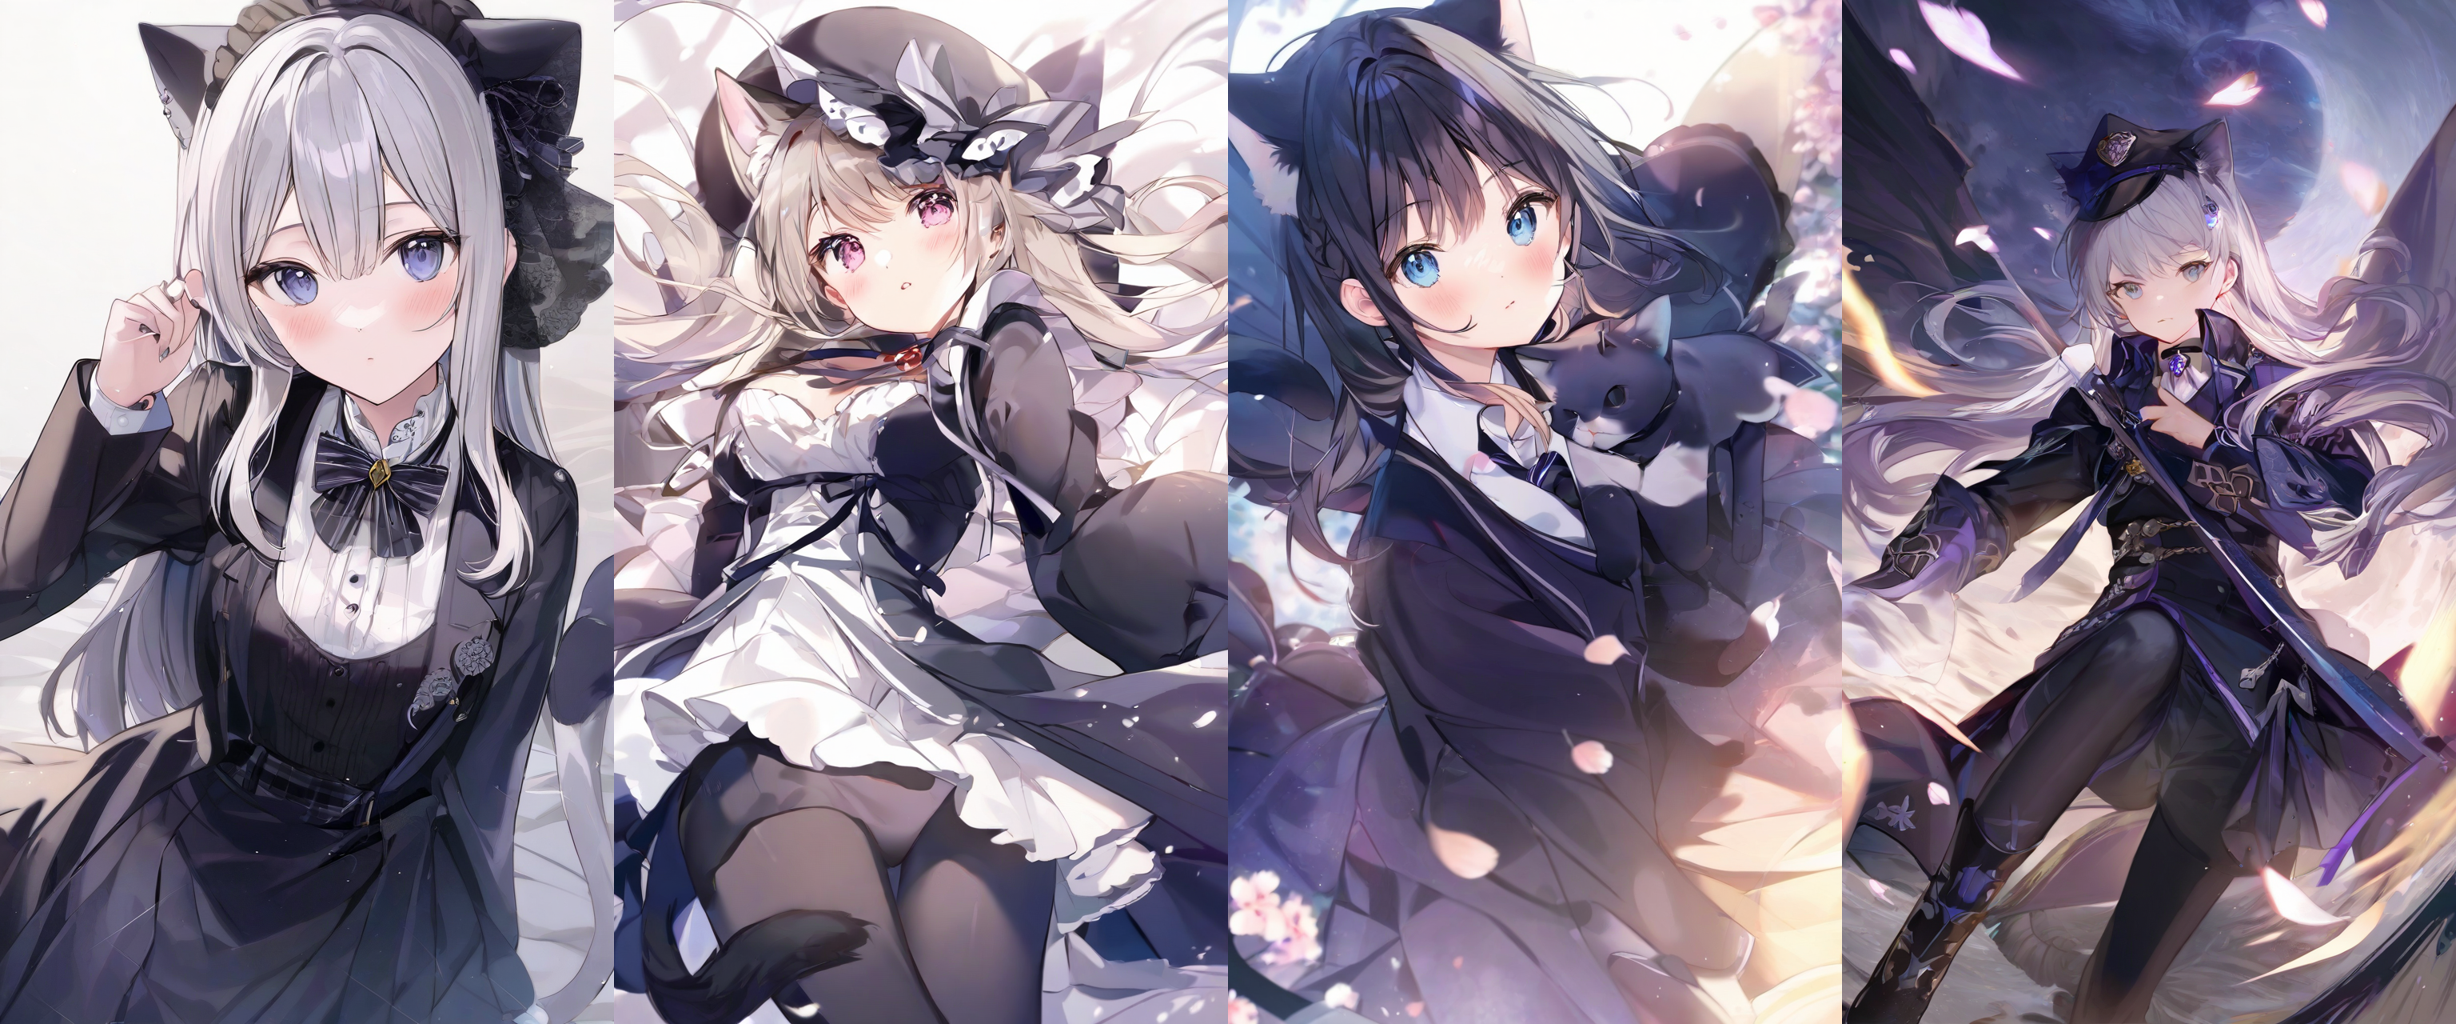

In [11]:
# display
concatenated_image = concatenate_images_horizontally(workflow_result)
display(concatenated_image)

## Use with Gradio

In [1]:
import gradio as gr

def gradio_interface(pos_text, neg_text, model, seed):
    print(f"Running workflow with pos_text={pos_text}, neg_text={neg_text}, model={model}, seed={seed}")
    images = run_workflow(pos_text, neg_text, model, seed)
    return images


# Define the allowed checkpoints
allowed_checkpoints = [
    "bxl-v4c-stepfix/checkpoint-e0_s1000.safetensors","bxl-v4c-stepfix/checkpoint-e1_s4000.safetensors", 
    "bxl-v4c-stepfix/checkpoint-e2_s8000.safetensors",  "bxl-v4c-stepfix/checkpoint-e3_s11000.safetensors", 
    "bxl-v4c-stepfix/checkpoint-e4_s14000.safetensors", "bxl-v4c-stepfix/checkpoint-e5_s19000.safetensors"
]

interface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Textbox(label="Positive Text Prompt"),
        gr.Textbox(label="Negative Text Prompt", value=DEFAULT_NEG),
        gr.Dropdown(choices=allowed_checkpoints, label="Model Checkpoint", value=-1),
        gr.Number(label="Seed", value=-1)
    ],
    outputs=gr.Gallery(label="Generated Images", height=768)
)

interface.launch(share=True)

/root/miniconda3/lib/python3.10/site-packages/gradio/components/dropdown.py:181: UserWarning: The value passed into gr.Dropdown() is not in the list of choices. Please update the list of choices to include: -1 or set allow_custom_value=True.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://d2a9802f7bcedc7a42.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Running workflow with pos_text=1girl, neg_text=lowres, worst quality, displeasing, bad quality, bad anatomy, text, error, extra digit, cropped, average quality, model=bxl-v4c-stepfix/checkpoint-e5_s19000.safetensors, seed=-1


## Use Directly